# Description :

With the advancements of Artificial Intelligence in self-driving cars, big companies like Tesla, Uber, Google, etc are working to develop autonomous vehicles. So, for achieving accuracy in this technology, the vehicles should be able to interpret traffic signs and make decisions accordingly.

Dataset url : https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign




# Step 0 : Import Libraries and dataset

In [1]:
# Importing standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
import os

data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Step 1 : Data Preprocessing

In [3]:
# Converting to array
data = np.array(data)
labels = np.array(labels)

In [4]:
# Dataset Dimensions - (Number of Images, Width, Length, Color channels)
print("Dataset dimensions : ",data.shape)

Dataset dimensions :  (39209, 30, 30, 3)


In [5]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)

In [6]:
# Checking dimensions - (Number of Images, Width, Length, Color channels)
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("Y_train shape : ", Y_train.shape)
print("Y_test shape : ", Y_test.shape)

X_train shape :  (31367, 30, 30, 3)
X_test shape :  (7842, 30, 30, 3)
Y_train shape :  (31367,)
Y_test shape :  (7842,)


In [7]:
# Converting integer class to binary class
from keras.utils import to_categorical
Y_train_categorical = to_categorical(Y_train, 43)
Y_test_categorical = to_categorical(Y_test, 43)

Using TensorFlow backend.



# Step 2 : Data Visualization

	 Sign category : 3


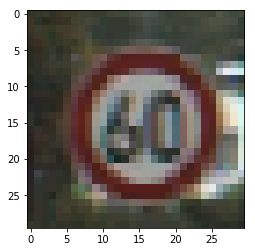

In [8]:
# Visualizing Dataset Images
i = 100
plt.imshow(X_train[i])
print("\t Sign category :",Y_train[i])

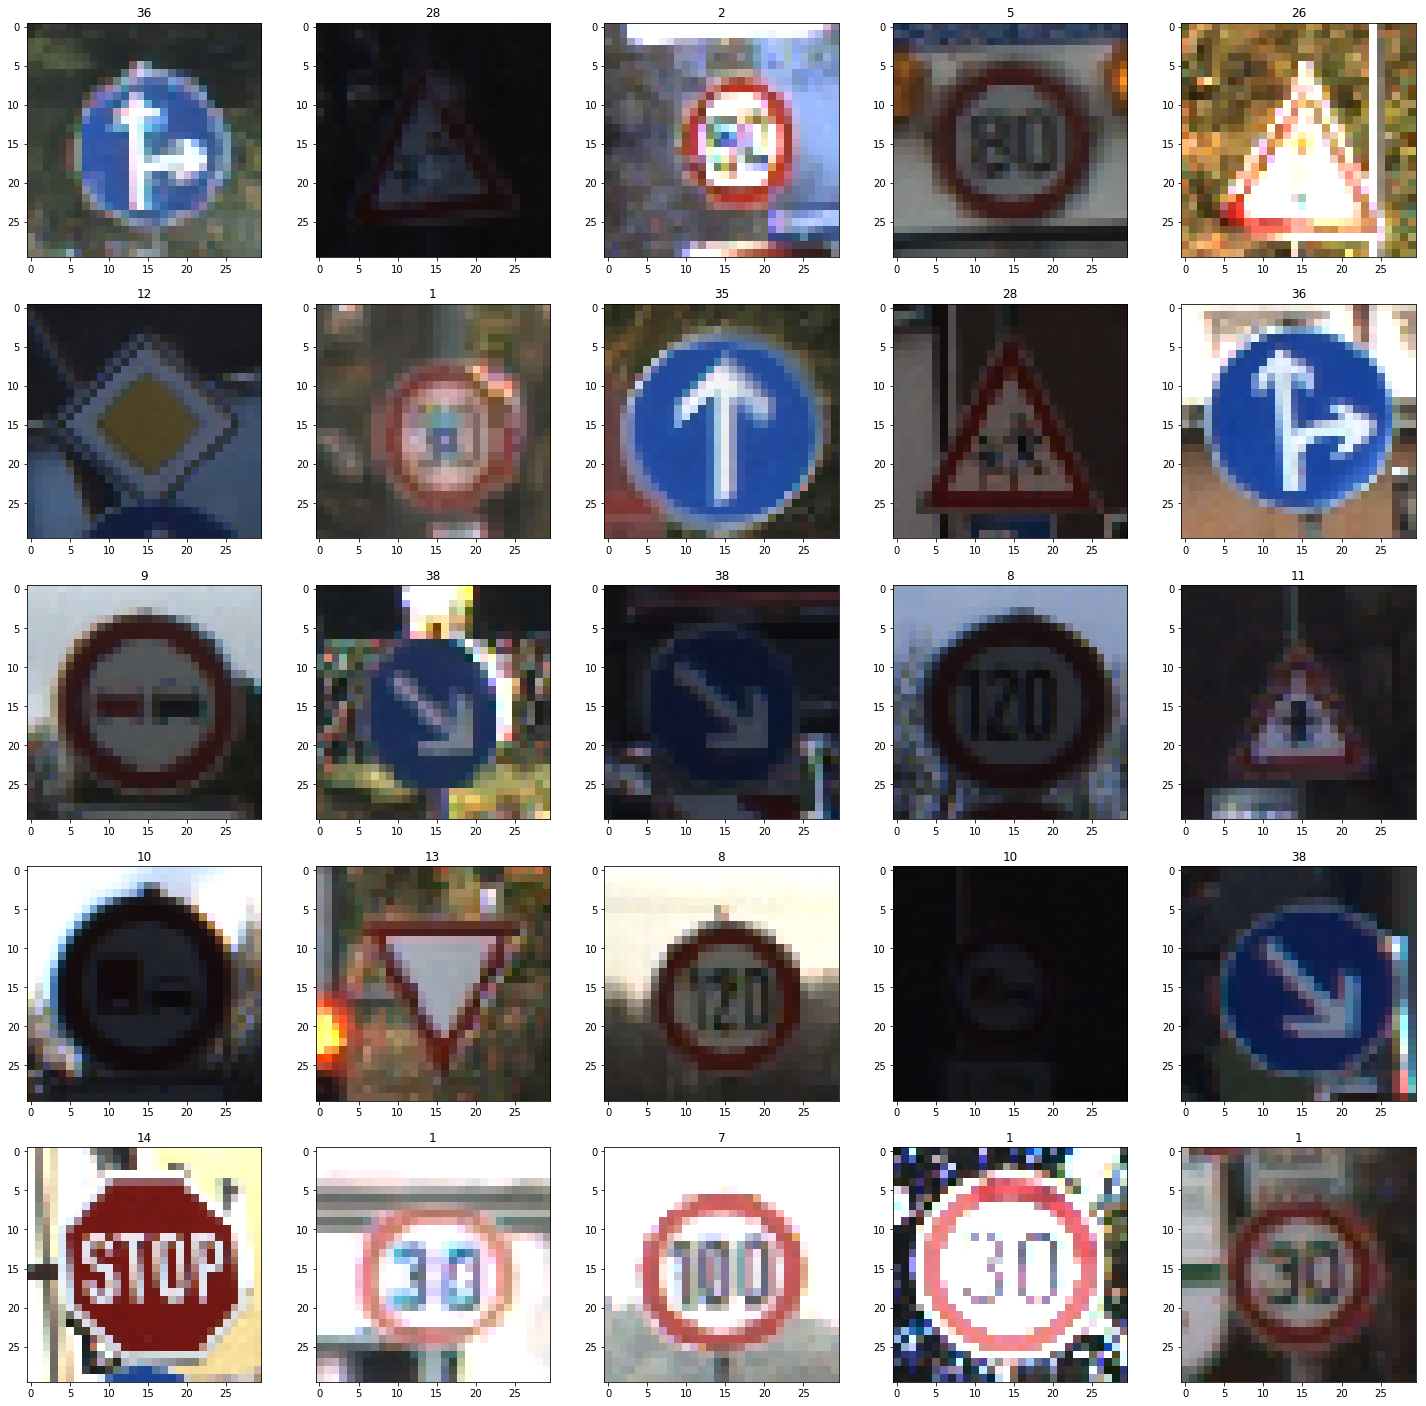

In [9]:
# Visualizing Dataset Images
fig, axes = plt.subplots(5, 5, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in range(0, 25):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[i])
    axes[i].set_title(Y_train[i])

## Step 3 : Training the model

In [10]:
# Importing Keras Libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [11]:
# Creating Neural network Architecture

# Initialize neural network
model = Sequential()

# Add 2 convolutional layers with 32 filters, a 5x5 window, and ReLU activation function
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation = 'relu'))

# Add max pooling layer with a 2x2 window
model.add(MaxPool2D(pool_size = (2, 2)))

# Add dropout layer
model.add(Dropout(rate = 0.25))

# Add 2 convolutional layers with 64 filters, a 3x3 window, and ReLU activation function
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))

# Add max pooling layer with a 2x2 window
model.add(MaxPool2D(pool_size = (2, 2)))

# Add dropout layer
model.add(Dropout(rate = 0.25))

# Add layer to flatten input
model.add(Flatten())

# Add fully connected layer of 256 units with a ReLU activation function
model.add(Dense(256, activation = 'relu'))

# Add dropout layer
model.add(Dropout(rate = 0.5))

# Add fully connected layer of 256 units with a Softmax activation function
model.add(Dense(43, activation = 'softmax'))

W0202 09:08:26.318623 23468 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0202 09:08:26.347496 23468 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0202 09:08:26.355442 23468 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0202 09:08:26.403382 23468 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0202 09:08:26.407412 23468 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:133:

In [12]:
# Summarizing the model architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
__________

In [13]:
# Compile neural network
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

W0202 09:08:33.554046 23468 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0202 09:08:33.602057 23468 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [14]:
# Train neural network
history = model.fit(X_train, Y_train_categorical, batch_size = 32, epochs = 15, validation_data = (X_test, Y_test_categorical))

W0202 09:08:52.228419 23468 deprecation.py:323] From C:\Users\Aditya\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 102s 3ms/step - loss: 1.7748 - acc: 0.5946 - val_loss: 0.2620 - val_acc: 0.9277
Epoch 2/15
31367/31367 [==============================] - 97s 3ms/step - loss: 0.4323 - acc: 0.8759 - val_loss: 0.1470 - val_acc: 0.9596
Epoch 3/15
31367/31367 [==============================] - 90s 3ms/step - loss: 0.3015 - acc: 0.9129 - val_loss: 0.0943 - val_acc: 0.9739
Epoch 4/15
31367/31367 [==============================] - 98s 3ms/step - loss: 0.2762 - acc: 0.9232 - val_loss: 0.2815 - val_acc: 0.9249
Epoch 5/15
31367/31367 [==============================] - 99s 3ms/step - loss: 0.2392 - acc: 0.9351 - val_loss: 0.0899 - val_acc: 0.9741
Epoch 6/15
31367/31367 [==============================] - 96s 3ms/step - loss: 0.2235 - acc: 0.9392 - val_loss: 0.0902 - val_acc: 0.9758
Epoch 7/15
31367/31367 [==============================] - 96s 3ms/step - loss: 0.2494 - acc: 0.9356 - val_loss: 0.0692 - val_acc

# Step 4 : Model Evaluation

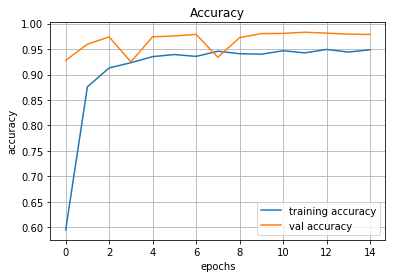

In [15]:
# Ploting graph - Epoch vs Accuracy
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.legend()
plt.show()

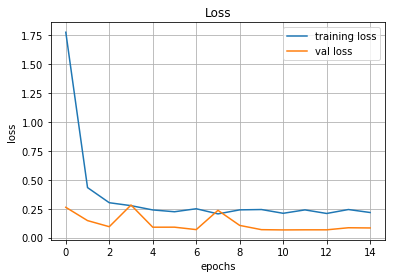

In [16]:
# Ploting graph - Epoch vs Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.show()

In [17]:
# Calculating Accuracy Score
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

pred = model.predict_classes(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score : ",accuracy_score(labels, pred))

Accuracy Score :  0.9499604117181314
